# ABC–XYZ–анализ ассортимента интернет-магазина товаров для дома

Материалы к проекту:

Дашборд (Набор №1)
https://public.tableau.com/app/profile/olga7901/viz/ecommerce_dashboard/sheet0

Презентация https://disk.yandex.ru/i/G9k8u3HSEEXkqg

## Описание проекта:   

Таблица с историей покупок интернет-магазина товаров для дома "Пока все ещё тут".  

Цель проекта:  

Исследовать ассортимент товаров Интернет-магазина, с целью оптимизации товарной матрицы для увеличения среднего чека. 

1) Предобработка данных и исследовательский анализ.  

2) Определение прибыльных и нерентабельных товаров.   
- подсчёт процента прибыли с каждого товара  
- создание отдельного столбеца с суммарной долей товара  
- определение лидеров/середнячков/аутсайдеров среди товаров:  
лидеры: 20% товаров, которые приносят 80% прибыли  
середнячки: 30%, которые приносят 15% прибыли  
аутсайдеры: оставшиеся 50%, которые составляют 5% прибыли  


3) Определение самых ходовых товары со стабильным спросом.  
- рассчёт коэффициента вариации, который показывает колебание спроса за год.  
- ранжирование объектов по коэффициенту вариации:  
товары со стабильным спросом. Колебание коэффициента от 0−10%  
середнячки, например, сезонные товары. Колебание коэффициента10−25%  
товары со случайным спросом. Колебание коэффициента от 25%  
- исследование распределения объектов по финансовой привлекательности и тенденции роста ценности, для рекомендации по формированию товарной матрицы.  

4) Формулирование и проверка статистических гипотез. 

5) Презентация.  

6) Выводы и рекомендации для отдела закупок.

##  1.1 Предобработка данных

In [2]:
import pandas as pd
import datetime
import numpy as np

from matplotlib import pyplot as plt
from plotly import graph_objects as go
import seaborn as sns

from scipy.stats import ttest_ind
from scipy import stats as st

import warnings
warnings.filterwarnings('ignore')

In [3]:
ecom = pd.read_csv('https://code.s3.yandex.net/datasets/ecommerce_dataset.csv')
ecom.head(20)

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0
5,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Шеффлера Лузеана d-9 см,1,164.0
6,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Юкка нитчатая d-12 см h-25-35 см,1,134.0
7,2018100108,375e0724-f033-4c76-b579-84969cf38ee2,68479,Настенная сушилка для белья Gimi Brio Super 100,1,824.0
8,2018100108,6644e5b4-9934-4863-9778-aaa125207701,68478,"Таз пластмассовый 21,0 л круглый ""Водолей"" С61...",1,269.0
9,2018100109,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,Чехол для гладильной доски Colombo Persia Beig...,1,674.0


так, видим следующие данные в таблице:  
- date — дата заказа;  
- customer_id — идентификатор покупателя;  
- order_id — идентификатор заказа;  
- product — наименование товара;  
- quantity — количество товара в заказе  
- price — цена товара.  

In [4]:
ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         6737 non-null   int64  
 1   customer_id  6737 non-null   object 
 2   order_id     6737 non-null   int64  
 3   product      6737 non-null   object 
 4   quantity     6737 non-null   int64  
 5   price        6737 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB


Всего в таблице 6737 строк, пропусков в столбцах не наблюдается.

In [5]:
ecom['date'] = pd.to_datetime(ecom['date'], format='%Y%m%d%H')

display(ecom['date'].min())
display(ecom['date'].max())
display(ecom['date'].max()-ecom['date'].min())

Timestamp('2018-10-01 00:00:00')

Timestamp('2019-10-31 16:00:00')

Timedelta('395 days 16:00:00')

In [6]:
ecom['year'] = ecom['date'].dt.year
ecom['date'].dt.weekday

ecom['month'] = ecom['date'].astype('datetime64[M]') 
ecom['week'] = ecom['date'].astype('datetime64[W]') 

для дальнейшего анализа делаем отдельно столбцы: год, месяц, день и переводим их в datetime

In [7]:
display('Количество дубликатов:', ecom.duplicated().sum())

'Количество дубликатов:'

0

In [8]:
display('Количество пропусков:',ecom.isna().sum())

'Количество пропусков:'

date           0
customer_id    0
order_id       0
product        0
quantity       0
price          0
year           0
month          0
week           0
dtype: int64

## 1.2. Исследовательский анализ данных

In [9]:
display('Количество уникальных пользователей:',ecom['customer_id'].nunique())

'Количество уникальных пользователей:'

2451

In [10]:
ecom[['quantity', 'price']].describe()

,quantity,price
count,6737.000000,6737.000000
mean,2.501559,462.028499
std,15.266478,871.296064
min,1.000000,9.000000
25%,1.000000,101.000000
50%,1.000000,135.000000
75%,1.000000,398.000000
max,1000.000000,14917.000000


In [11]:
display(ecom[ecom['quantity'] == 1000])

,date,customer_id,order_id,product,quantity,price,year,month,week
5456,2019-06-18 15:00:00,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,"Вантуз с деревянной ручкой d14 см красный, Bur...",1000,675.0,2019,2019-06-01,2019-06-13


Скажем так: может быть покупка 1000 вантузов и правда, но очень нетипично и выбивается из общего ряда, поэтому сочтём это за выброс и строку удалим:

In [12]:
ecom.drop(labels = [5456],axis = 0, inplace = True)

Посмотрим у какого товара самая больша цена продажи:

In [13]:
display(ecom[ecom['price'] == 14917])

,date,customer_id,order_id,product,quantity,price,year,month,week
5992,2019-07-29 17:00:00,0d87f4ae-465a-4fac-81e6-5d629761783e,72139,Сушилка уличная Leifheit 85210 LINOMATIC V 400...,1,14917.0,2019,2019-07-01,2019-07-25


Поиск показал, что стоимость этой сушилки впольне реальная) Оставим как есть.

In [14]:
ecom[['quantity']].describe()

,quantity
count,6736.000000
mean,2.353474
std,9.238065
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,334.000000


Сделаем отдельную колонку: прибыль

In [15]:
ecom['revenue'] = ecom['quantity'] * ecom['price']

In [16]:
ecom['revenue'].count()

6736

In [17]:
ecom['revenue'].sum()

4176280.0

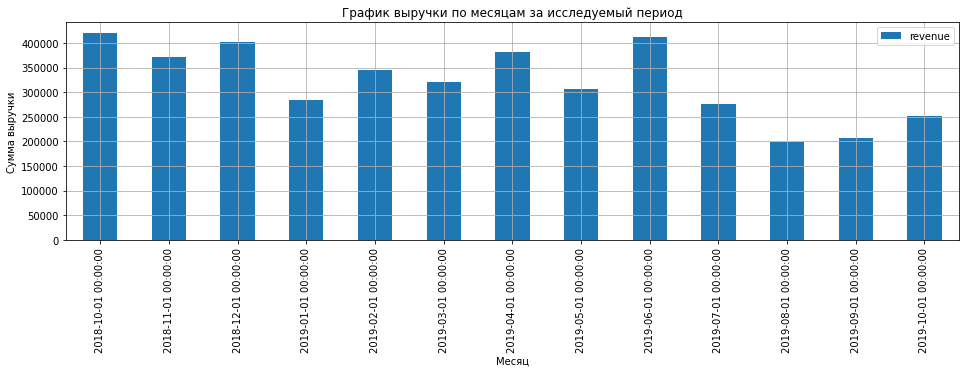

In [18]:
ecom_sum = ecom.pivot_table(index='month', values='revenue', aggfunc='sum').plot(grid=True, kind='bar', figsize=(16, 4))
plt.xlabel('Месяц')
plt.ylabel('Сумма выручки')
plt.title('График выручки по месяцам за исследуемый период')
plt.show()

Выручка падает после всплеска 13.06.2019, на предыдущий уровень медленно возвращается с 10.10.2019. Возожно это сезонность. 

Осенью и зимой выручка более равномерная, весной и летом есть много выбросов.

## Анализ АВС-XYZ: определяем прибыльные и нерентабельные товары.

ABC–анализ представляет собой метод, при помощи которого можно упорядочить ассортимент товаров по значимости.  

Ассортимент товаров разбивается на следующие группы:  
Группа A – товары дают 80 % выручки, содержит 20 % наименований;  
Группа B – товары дают 15 % выручки, содержит 30 % наименований;  
Группа C – товары дают 5 % выручки, содержит 50 % наименований.


XYZ–анализ - статистический метод, с помощью которого можно анализировать и прогнозировать стабильность продаж отдельных видов
товаров.    
Группа Х (отклонение от 0% до 10%) – товары со стабильной величиной потребления и высокой степенью прогнозирования.  
Группа Y (изменение от 10% до 25%). Сезонные колебания и средние возможности прогнозирования.  
Группа Z (отклонение выше 25%). Это товары с нерегулярным потреблением и непредсказуемыми колебаниями, поэтому точно спрогнозировать их спрос невозможно.

In [19]:
ecom_12m = ecom[(ecom['date'] > '2018-10-31')&(ecom['date'] <= '2019-10-31')]

Определяем период времени исследования: 1 год с 01-11-2018 по 31-10-2019

In [20]:
ecom_12m.sample(5)

,date,customer_id,order_id,product,quantity,price,year,month,week,revenue
6030,2019-08-03 13:00:00,55b8d928-77f8-40fc-a2e9-08424d13b0e4,72188,Муляж Персики мини полиуретан d-6 см,1,22.0,2019,2019-08-01,2019-08-01,22.0
4946,2019-06-09 17:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,"Рассада Кабачка сорт Аэронавт, кассета по 6шт",1,120.0,2019,2019-06-01,2019-06-06,120.0
3972,2019-05-21 09:00:00,dff9a4de-1447-434a-936a-02cbdf51a521,14800,"Рассада Огурца сорт Форсаж, кассета по 6шт",1,120.0,2019,2019-05-01,2019-05-16,120.0
4422,2019-06-03 20:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,"Рассада Патиссона сорт НЛО Белый, кассета по 6шт",1,120.0,2019,2019-06-01,2019-05-30,120.0
3527,2019-05-11 19:00:00,dddcafaf-6ca9-4427-9e54-a1cdd9323bec,14750,Рассада Арбуза сорт Шуга Бэби горшок 9х9 см P-9,1,38.0,2019,2019-05-01,2019-05-09,38.0


Создаём отдельный столбец с номерами месяца для дальнейшей группировки по нему. Порядковый номер соотвтествует календарному, где 1-январь, 2-февраль и т.д.

In [21]:
ecom_12m = ecom_12m.assign(month = pd.to_datetime(ecom_12m['date']).dt.month)
#ecom_12m = ecom_12m.assign('month_season')
ecom_12m.sample(5)

,date,customer_id,order_id,product,quantity,price,year,month,week,revenue
2988,2019-04-21 06:00:00,af19e0e1-1279-4f87-981f-29ca212fc6f9,71222,Искусственный цветок Гербера пластиковая светл...,2,29.0,2019,4,2019-04-18,58.0
1879,2019-02-18 03:00:00,051d78d4-3667-4018-90d5-2e7ae8c98816,70312,Тележка багажная DELTA ТБР-20 синий грузоподъе...,1,727.0,2019,2,2019-02-14,727.0
6329,2019-09-15 11:00:00,8e3a4e2d-4c9e-4983-a269-61fbf84020f9,72635,Сушилка для белья напольная COLOMBO ALPINA 30M...,1,1574.0,2019,9,2019-09-12,1574.0
6246,2019-09-04 08:00:00,f978b6ac-c601-49d9-9700-833330a4616a,72500,"Чайник со свистком Attribute DERBY 2,5 л ASS305",1,1049.0,2019,9,2019-08-29,1049.0
6007,2019-07-31 16:00:00,794e66f5-4d30-4860-b44c-903c9f58127f,72162,Спатифиллум Свит Лауретта d-21 см h-95 см,5,1762.0,2019,7,2019-07-25,8810.0


In [22]:
ecom_12m['product'].value_counts()

Рассада Кабачка сорт Зебра кассета 6 шт E6                               79
Рассада Кабачка сорт Золотинка кассета 6 шт E6                           78
Рассада Кабачка сорт Белогор кассета 6 шт E6                             77
Тагетис крупноцветковый рассада однолетних цветов в кассете по 10 шт     76
Рассада Огурец Фараон ячейки по 6 шт Е6                                  76
                                                                         ..
Штора для ванной комнаты Bacchetta Fabric текстильная 180х200 см 3656     1
Крокусы Pickwick голубой в горшке d-21 см 19 луковиц                      1
Муляж Виноград 17 см цвет в ассортименте                                  1
Ведро AMPARI РТ9061СЛРОЗ-10РS 12 л сливочно-розовый                       1
Каланхое каландива малиновое d-7 см                                       1
Name: product, Length: 2121, dtype: int64

In [23]:
ecom_12m['revenue'].sum()

3761962.0

В дальнейшем исследовании учавствует 2121 товар.

Теперь, когда мы взглянули на данные, нам нужно переформатировать их, чтобы у нас были ежемесячные данные для каждого товара, разделенные в фрейме. Cгруппируем() столбец product и month и создадим фрейм данных на основе суммы()  количества товаров.

In [24]:
ecom_12m_units = ecom_12m.groupby(['product','month'])['quantity'].sum().to_frame().reset_index()
ecom_12m_units.head()

,product,month,quantity
0,Tepмокружка AVEX Freeflow 700 мл зеленый AVEX0759,3,1
1,Tepмокружка AVEX Freeflow 700 мл сталь AVEX0776,8,1
2,Tepмокружка AVEX Recharge 500 мл голубой AVEX0681,2,1
3,Ёрш бутылочный с металлической ручкой малый Y6...,10,10
4,Ёрш радиаторный без ручки 1807007,5,2


С помощью функции pivot() поместим каждый product в отдельную строку и сохраним количество единиц, проданных за каждый месяц, в отдельной колонке.

In [25]:
ecom_12m_units = ecom_12m_units.pivot(index='product', columns='month', values='quantity').add_prefix('m').reset_index().fillna(0)
ecom_12m_units.head()

month,product,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,Tepмокружка AVEX Freeflow 700 мл зеленый AVEX0759,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Tepмокружка AVEX Freeflow 700 мл сталь AVEX0776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,Tepмокружка AVEX Recharge 500 мл голубой AVEX0681,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Ёрш бутылочный с металлической ручкой малый Y6...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0
4,Ёрш радиаторный без ручки 1807007,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Рассчитаем стандартное отклонение в ежемесячном спросе для каждого артикула

In [26]:
ecom_12m_units['std_demand'] = ecom_12m_units[['m1','m2','m3','m4','m5','m6',
                                    'm7','m8','m9','m10','m11','m12']].std(axis=1)
ecom_12m_units.head()

month,product,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,std_demand
0,Tepмокружка AVEX Freeflow 700 мл зеленый AVEX0759,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.288675
1,Tepмокружка AVEX Freeflow 700 мл сталь AVEX0776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.288675
2,Tepмокружка AVEX Recharge 500 мл голубой AVEX0681,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.288675
3,Ёрш бутылочный с металлической ручкой малый Y6...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,2.886751
4,Ёрш радиаторный без ручки 1807007,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.577350


Поскольку нам также нужно знать годовой спрос, нам затем нужно вычислить сумму всех данных по месяцам, сложим столбцы вместе, а затем создадим новый столбец при помощи assign().

In [27]:
ecom_12m_units = ecom_12m_units.assign(total_demand = ecom_12m_units['m1'] + ecom_12m_units['m2'] + 
                                                 ecom_12m_units['m3'] + ecom_12m_units['m4'] + 
                                                 ecom_12m_units['m5'] + ecom_12m_units['m6'] + 
                                                 ecom_12m_units['m7'] + ecom_12m_units['m8'] + 
                                                 ecom_12m_units['m9'] + ecom_12m_units['m10'] + 
                                                 ecom_12m_units['m11'] + ecom_12m_units['m12']
                                  )
ecom_12m_units.head()

month,product,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,std_demand,total_demand
0,Tepмокружка AVEX Freeflow 700 мл зеленый AVEX0759,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.288675,1.0
1,Tepмокружка AVEX Freeflow 700 мл сталь AVEX0776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.288675,1.0
2,Tepмокружка AVEX Recharge 500 мл голубой AVEX0681,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.288675,1.0
3,Ёрш бутылочный с металлической ручкой малый Y6...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,2.886751,10.0
4,Ёрш радиаторный без ручки 1807007,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.577350,2.0


Рассчитаем среднемесячный спрос: разделим значение столбца total_demand на количество месяцев - 12.

In [28]:
ecom_12m_units = ecom_12m_units.assign(avg_demand = ecom_12m_units['total_demand'] / 12 )
ecom_12m_units.head()

month,product,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,std_demand,total_demand,avg_demand
0,Tepмокружка AVEX Freeflow 700 мл зеленый AVEX0759,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.288675,1.0,0.083333
1,Tepмокружка AVEX Freeflow 700 мл сталь AVEX0776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.288675,1.0,0.083333
2,Tepмокружка AVEX Recharge 500 мл голубой AVEX0681,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.288675,1.0,0.083333
3,Ёрш бутылочный с металлической ручкой малый Y6...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,2.886751,10.0,0.833333
4,Ёрш радиаторный без ручки 1807007,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.577350,2.0,0.166667


Рассчитаем коэффициент вариации спроса (СV) в течение года,то есть среднее значение спроса по сравнению со стандартным отклонением спроса. Значение, близкое к нулю, означает, что существует минимальная вариация и более высокая предсказуемость, в то время как высокие значения подразумевают обратное.

In [29]:
ecom_12m_units['cov_demand'] = ecom_12m_units['std_demand'] / ecom_12m_units['avg_demand']

Посмотрим начало () и конец () датафрейма, чтобы изучить наиболее и наименее изменчивые продукты.Снова видим, что все товары приведенные имеют значение 3,46 для их cov_demand, что связано с тем, что все они были проданы всего за один месяц из 12 в наборе данных.

In [30]:
ecom_12m_units.sort_values(by='cov_demand', ascending=False).head(5)

month,product,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,std_demand,total_demand,avg_demand,cov_demand
2013,Щетка для мытья посуды КОЛИБРИ М5202 большая,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.867513,100.0,8.333333,3.464102
142,Вешалка Valiant для брюк и юбок металлическая ...,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.433757,50.0,4.166667,3.464102
196,Гвоздика стандартная Новия 70 см Колумбия План...,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.216878,25.0,2.083333,3.464102
1270,Роза кустовая Ред Лейс 60 см Кения плантация W...,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.216878,25.0,2.083333,3.464102
1276,Роза одноголовая Тоффи 70 см Эквадор плантация...,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.216878,25.0,2.083333,3.464102


In [31]:
ecom_12m_units.sort_values(by='cov_demand', ascending=True).head(5)

month,product,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,std_demand,total_demand,avg_demand,cov_demand
1709,Тележка багажная DELTA ТБР-20 коричневый с ора...,1.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,1.0,0.0,2.0,0.0,0.887625,16.0,1.333333,0.665719
921,Пеларгония розебудная Queen Ingrid укорененный...,0.0,3.0,5.0,7.0,6.0,3.0,5.0,6.0,1.0,5.0,0.0,0.0,2.609714,41.0,3.416667,0.763819
908,Пеларгония зональная простая цвет фуксии,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.514929,7.0,0.583333,0.882735
878,Пеларгония зональная диам. 12 см коралловая по...,1.0,4.0,3.0,5.0,4.0,1.0,0.0,0.0,2.0,0.0,5.0,1.0,1.946247,26.0,2.166667,0.898268
920,Пеларгония розебудная Prins Nikolai укорененны...,0.0,11.0,15.0,13.0,7.0,10.0,6.0,8.0,3.0,0.0,0.0,0.0,5.468228,73.0,6.083333,0.898887


In [32]:
display(ecom_12m_units['cov_demand'].min())
display(ecom_12m_units['cov_demand'].max())
display(ecom_12m_units['cov_demand'].mean())

0.665719023448946

3.4641016151377557

3.0970435409360904

 Значения min(), mean() и max() показывают, что наименьшее значение CV равно 0,66, наибольшее - 3,46, а общее среднее значение равно 3.09.  
 В связи с этим можно сказать, что набор данных включает в себя множество продуктов с изменяющимся или сезонным спросом, что значительно усложняет контроль над закупками для сотрудников отдела.

Смотрим распределение коэфициента вариации по всей продукции:

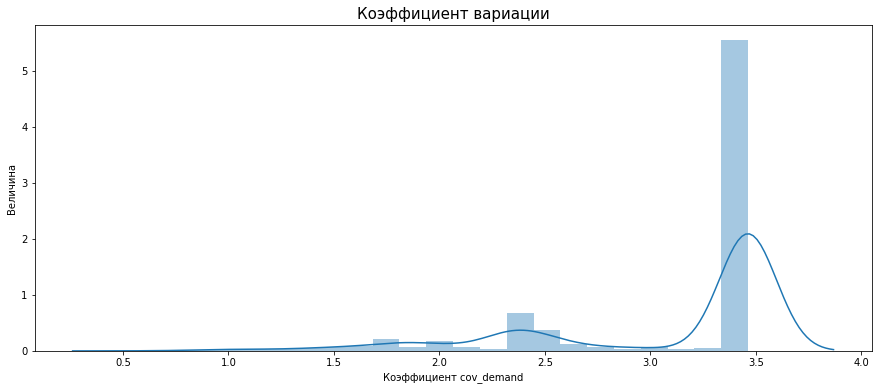

In [33]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.distplot(ecom_12m_units['cov_demand']).set_title("Коэффициент вариации",fontsize=15)
plt.xlabel('Коэффициент cov_demand')
plt.ylabel('Величина')
plt.show()

График распределения по всему ассортименту продукции построен. Учитывая, что товары с CV более 1 намного сложнее предсказать из-за колебаний спроса, ассортимент товарного запаса довольно сложно формировать, если только компания не имеет объёмных буферных запасов.

## XYZ - Выделяем самые ходовые товары со стабильным спросом

Создадим функцию для получения значения cov_demand из нашего фрейма данных, а затем присвоим соответствующий класс на основе правил XYZ с коэффициентом вариации, которые мы определили выше. 

Согласно утвержденному плану в декомпозиции задачи,делим товары на такое соотношение:  
Х-товары со стабильным спросом. Колебание коэффициента от 0−10%  
Y-середнячки, например, сезонные товары. Колебание коэффициента 10−25%  
Z-товары со случайным спросом. Колебание коэффициента от 25%  

In [34]:
def xyz_classify_product(cov):
    if cov <= 1.0:
        return 'X'
    elif cov > 1.0 and cov <= 2.5:
        return 'Y'
    else:
        return 'Z'

In [35]:
ecom_12m_units['xyz_class'] = ecom_12m_units['cov_demand'].apply(xyz_classify_product)
ecom_12m_units.xyz_class.value_counts()

Z    1605
Y     505
X      11
Name: xyz_class, dtype: int64

Товары с CV 1 или ниже предсказуемы и имеют стабильные продажи круглый год, поэтому они относятся к классу X.  
Товары с CV от 1 до 2,5 менее предсказуемы и сложнее в прогнозировании, они относятся к классу Y.   
Большинство наших товаров(1605) имеет CV более 2.5, относится к классу Z, поскольку его продажи сложнее рассчитать и  они подвержены колебаниям в течение года  потому, что продаются только эпизодически.  
Эти товары имеют низкий спрос, и продажи судя по всему основаны на количестве единиц. Именно те, что относятся к классам Z, продаются в самых больших объемах.

In [36]:
ecom_12m_units.head()

month,product,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,std_demand,total_demand,avg_demand,cov_demand,xyz_class
0,Tepмокружка AVEX Freeflow 700 мл зеленый AVEX0759,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.288675,1.0,0.083333,3.464102,Z
1,Tepмокружка AVEX Freeflow 700 мл сталь AVEX0776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.288675,1.0,0.083333,3.464102,Z
2,Tepмокружка AVEX Recharge 500 мл голубой AVEX0681,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.288675,1.0,0.083333,3.464102,Z
3,Ёрш бутылочный с металлической ручкой малый Y6...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,2.886751,10.0,0.833333,3.464102,Z
4,Ёрш радиаторный без ручки 1807007,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.577350,2.0,0.166667,3.464102,Z


In [37]:
ecom_12m_units.groupby('xyz_class').agg(
    total_products=('product', 'nunique'),
    total_demand=('total_demand', 'sum'),    
    std_demand=('std_demand', 'mean'),      
    avg_demand=('avg_demand', 'mean'),
    avg_cov_demand=('cov_demand', 'mean'),
)

,total_products,total_demand,std_demand,avg_demand,avg_cov_demand
xyz_class,,,,,
X,11,385.0,2.624613,2.916667,0.890653
Y,505,5078.0,1.679836,0.837954,2.111271
Z,1605,8352.0,1.442325,0.433645,3.422330


Чтобы построить график данных XYZ и понять, как меняется спрос на каждый из классов в течение года,создадим новый датафрейм с именем ecom_month и сгруппируем продукты по их xyz_class, чтобы просуммировать выручку по месяцам.

In [38]:
ecom_monthly = ecom_12m_units.groupby('xyz_class').agg(
    m1=('m1', 'sum'),
    m2=('m2', 'sum'),
    m3=('m3', 'sum'),
    m4=('m4', 'sum'),
    m5=('m5', 'sum'),
    m6=('m6', 'sum'),
    m7=('m7', 'sum'),
    m8=('m8', 'sum'),
    m9=('m9', 'sum'),
    m10=('m10', 'sum'),
    m11=('m11', 'sum'),
    m12=('m12', 'sum'),
)

ecom_monthly.head()

,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
xyz_class,,,,,,,,,,,,
X,11.0,32.0,40.0,73.0,48.0,38.0,29.0,29.0,23.0,22.0,20.0,20.0
Y,202.0,495.0,447.0,757.0,993.0,433.0,305.0,203.0,191.0,183.0,537.0,332.0
Z,479.0,589.0,763.0,787.0,699.0,1618.0,436.0,203.0,324.0,836.0,796.0,822.0


используем функцию unstack()  и переименуем столбцы в соответствии с базовыми данными

In [39]:
ecom_monthly_unstacked = ecom_monthly.unstack('xyz_class').to_frame()
ecom_monthly_unstacked = ecom_monthly_unstacked.reset_index().rename(columns={'level_0': 'month', 0: 'demand'})
ecom_monthly_unstacked.head(10)

,month,xyz_class,demand
0,m1,X,11.0
1,m1,Y,202.0
2,m1,Z,479.0
3,m2,X,32.0
4,m2,Y,495.0
5,m2,Z,589.0
6,m3,X,40.0
7,m3,Y,447.0
8,m3,Z,763.0
9,m4,X,73.0


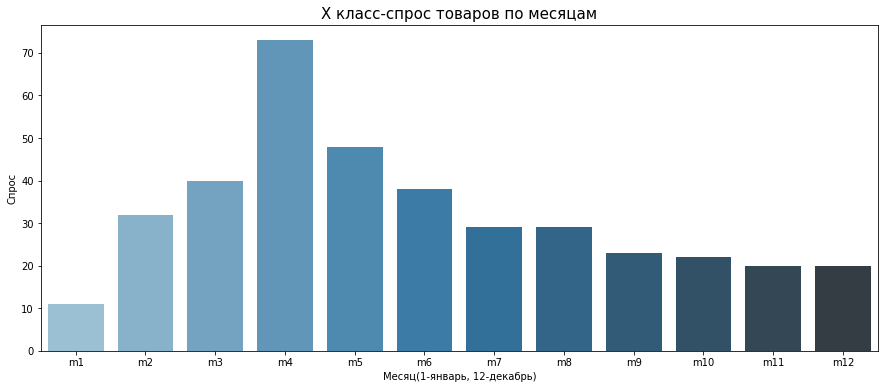

In [40]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x='month', 
                 y='demand', 
                 data=ecom_monthly_unstacked[ecom_monthly_unstacked['xyz_class']=='X'],
                 palette="Paired_d")\
                 .set_title("X класс-спрос товаров по месяцам",fontsize=15)
plt.xlabel('Месяц(1-январь, 12-декабрь)')
plt.ylabel('Спрос')
plt.show()

График товаров класса X показывает, что спрос на эти продукты относительно стабилен в течение всего года, но и тут изменения показывают, что у этого ритейлера действительно больше сезонных наименований товаров.

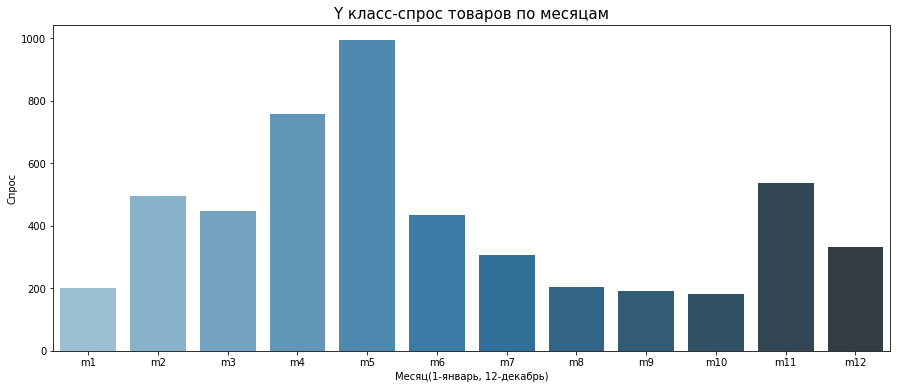

In [41]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x='month', 
                 y='demand', 
                 data=ecom_monthly_unstacked[ecom_monthly_unstacked['xyz_class']=='Y'],
                 palette="Paired_d")\
                 .set_title("Y класс-спрос товаров по месяцам",fontsize=15)
plt.xlabel('Месяц(1-январь, 12-декабрь)')
plt.ylabel('Спрос')
plt.show()

Данные категории Y показывают, что в теплое время года наблюдаются некоторые значительные изменения в спросе, а затем продажи этих товаров значительно падают, как только наступает осень.

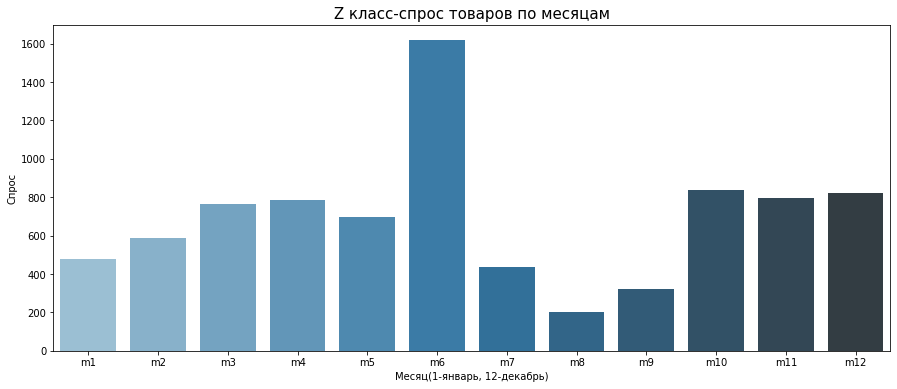

In [42]:
fig, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="month", 
                 y="demand", 
                 data=ecom_monthly_unstacked[ecom_monthly_unstacked['xyz_class']=='Z'],
                 palette="Paired_d").set_title("Z класс-спрос товаров по месяцам",fontsize=15)
plt.xlabel('Месяц(1-январь, 12-декабрь)')
plt.ylabel('Спрос')
plt.show()

Товары класса Z являются сезонными в летние месяцы, всплеск спроса, который они генерируют, в июне.

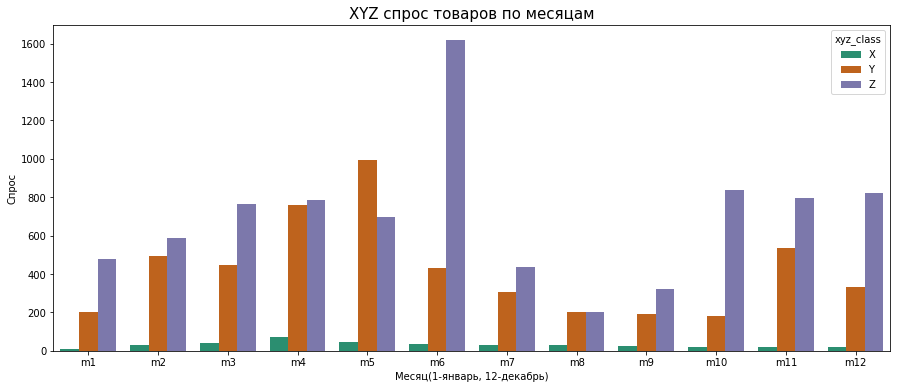

In [43]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="month", 
                 y="demand", 
                 hue="xyz_class", 
                 data=ecom_monthly_unstacked,
                 palette="Dark2").set_title("XYZ спрос товаров по месяцам",fontsize=15)
plt.xlabel('Месяц(1-январь, 12-декабрь)')
plt.ylabel('Спрос')
plt.show()

Общий график категорий ХУZ показывает огромный разрыв в количестве продаж более-менее стабильных и стихийных покупок товаров. В июне большой приток покупок категории Z, в мае-Y.

## АBC анализ ассортимента 

Поскольку анализ XYZ рассматривает только спрос на единицу объема, необходимо выполнить анализ запасов ABC, чтобы определить влияние каждой категории на доход. Мы повторно используем фрейм данных с месяцами, а затем запустим агрегацию для расчета показателей дохода для каждого наименования товара.

In [44]:
ecom_products = ecom_12m.groupby('product').agg(
    unique_purchases=('product', 'nunique'),
    total_units=('quantity', 'sum'),
    total_revenue=('revenue', 'sum'),
).sort_values(by='total_revenue', ascending=False).reset_index()
ecom_products.head()

,product,unique_purchases,total_units,total_revenue
0,Сумка-тележка 2-х колесная Gimi Argo красная,1,70,76090.0
1,Сумка-тележка 2-х колесная Gimi Argo синяя,1,55,58911.0
2,Простынь вафельная 200х180 см WELLNESS RW180-0...,1,30,53232.0
3,Сумка-тележка хозяйственная Rolser BAB010 rojo...,1,12,49668.0
4,Вешалки мягкие для деликатных вещей 3 шт шоколад,1,335,49596.0


Чтобы рассчитать категории ABC, нам нужно знать общий доход, полученный от всех товаров, и совокупный процентный вклад в доход, полученный с каждого товара.  Используем функцию cumsum() для вычисления совокупной суммы дохода, вычислим текущий процент дохода и сохраним его.

In [45]:
ecom_products['revenue_cumsum'] = ecom_products['total_revenue'].cumsum()
ecom_products['revenue_total'] = ecom_products['total_revenue'].sum()
ecom_products['revenue_running_percentage'] = (ecom_products['revenue_cumsum'] / ecom_products['revenue_total']) * 100
ecom_products.head()

,product,unique_purchases,total_units,total_revenue,revenue_cumsum,revenue_total,revenue_running_percentage
0,Сумка-тележка 2-х колесная Gimi Argo красная,1,70,76090.0,76090.0,3761962.0,2.022615
1,Сумка-тележка 2-х колесная Gimi Argo синяя,1,55,58911.0,135001.0,3761962.0,3.588580
2,Простынь вафельная 200х180 см WELLNESS RW180-0...,1,30,53232.0,188233.0,3761962.0,5.003586
3,Сумка-тележка хозяйственная Rolser BAB010 rojo...,1,12,49668.0,237901.0,3761962.0,6.323854
4,Вешалки мягкие для деликатных вещей 3 шт шоколад,1,335,49596.0,287497.0,3761962.0,7.642209


 Как и в случае с XYZ, создадим функцию для отнесения каждого продукта к соответствующей группе на основе его вклада в процентный доход. Товары поделены на категории, которые приносят 80% дохода-класс A, следующие 15% источников дохода - класс B, а остальные - класс C.

In [46]:
def abc_classify_product(percentage):
    if percentage > 0 and percentage <= 80:
        return 'A'
    elif percentage > 80 and percentage <= 95:
        return 'B'
    else:
        return 'C'

 Рассчитаем рейтинг продаж продукта с помощью функции rank().

In [47]:
ecom_products['abc_class'] = ecom_products['revenue_running_percentage'].apply(abc_classify_product)
ecom_products['abc_rank'] = ecom_products['revenue_running_percentage'].rank().astype(int)
ecom_products.head()

,product,unique_purchases,total_units,total_revenue,revenue_cumsum,revenue_total,revenue_running_percentage,abc_class,abc_rank
0,Сумка-тележка 2-х колесная Gimi Argo красная,1,70,76090.0,76090.0,3761962.0,2.022615,A,1
1,Сумка-тележка 2-х колесная Gimi Argo синяя,1,55,58911.0,135001.0,3761962.0,3.588580,A,2
2,Простынь вафельная 200х180 см WELLNESS RW180-0...,1,30,53232.0,188233.0,3761962.0,5.003586,A,3
3,Сумка-тележка хозяйственная Rolser BAB010 rojo...,1,12,49668.0,237901.0,3761962.0,6.323854,A,4
4,Вешалки мягкие для деликатных вещей 3 шт шоколад,1,335,49596.0,287497.0,3761962.0,7.642209,A,5


In [48]:
ecom_abc = ecom_products.groupby('abc_class').agg(
    total_products=('product', 'nunique'),
    total_units=('total_units', sum),
    total_revenue=('total_revenue', sum),
).reset_index()

ecom_abc

,abc_class,total_products,total_units,total_revenue
0,A,537,8469,3009264.0
1,B,612,3215,564373.0
2,C,972,2131,188325.0


Если мы теперь изучим статистику по каждому из классов, мы увидим, что у нас есть 537 в классе А, приносящий 80% нашего дохода. В классе B их 612, которые приносят следующие 15%, а затем огромные 972 в классе C, которые приносят нижние 5% продаж. Очевидно, что некоторые усилия руководства можно было бы сэкономить, сосредоточившись в основном на артикулах A и B, вместо того чтобы увязать в гораздо более медленных продажах артикулов класса C.

График данных класса ABC с точки зрения дохода, полученного от каждого класса -  распределение 80/15/5

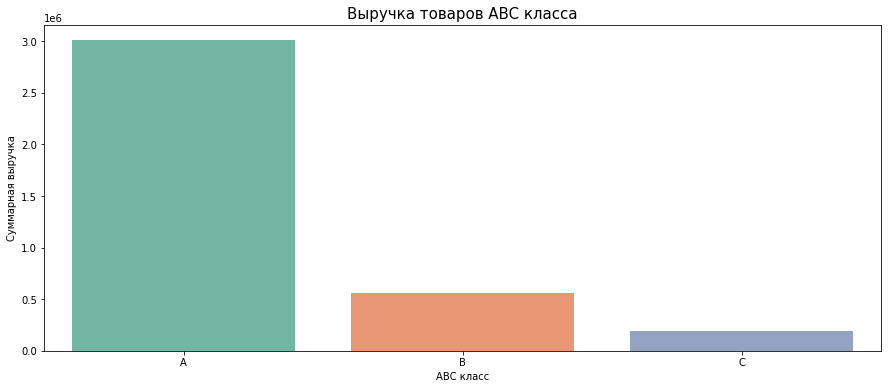

In [49]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="abc_class", 
                 y="total_revenue", 
                 data=ecom_abc,
                 palette="Set2")\
                .set_title("Выручка товаров ABC класса",fontsize=15)
plt.xlabel('АВС класс')
plt.ylabel('Суммарная выручка')
plt.show()

B классе C есть множество товаров, которые приносят только 5% от общего дохода компании.

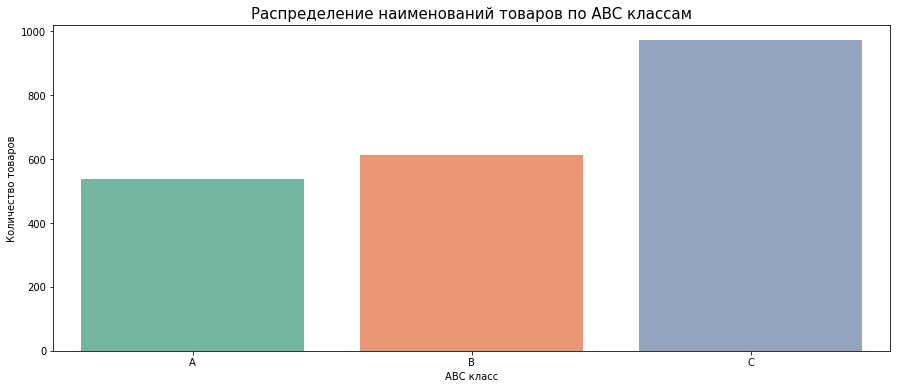

In [50]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="abc_class", 
                 y="total_products", 
                 data=ecom_abc,
                 palette="Set2")\
                .set_title("Распределение наименований товаров по ABC классам",fontsize=15)
plt.xlabel('АВС класс')
plt.ylabel('Количество товаров')
plt.show()

С точки зрения количества проданных единиц, очевидно, что в классе A есть много товаров, поскольку на них приходится 80% выручки, но есть также товары в классе C, что говорит о том, что здесь много дешевых сезонных товаров или вещей, которые продаются только эпизодически.

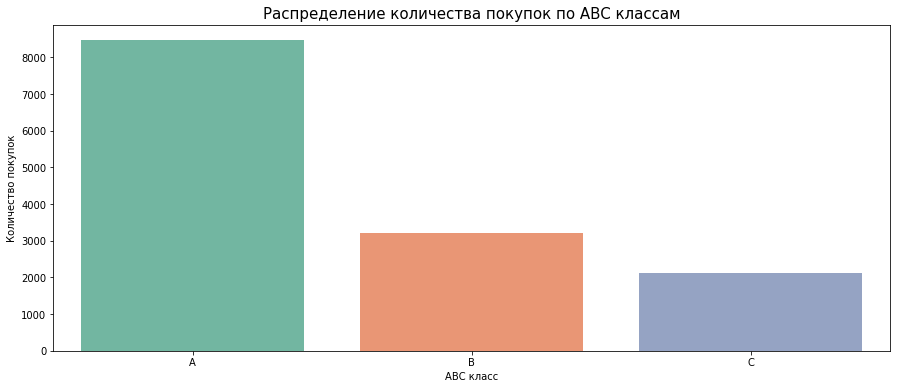

In [51]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="abc_class", 
                 y="total_units", 
                 data=ecom_abc,
                 palette="Set2").set_title("Распределение количества покупок по ABC классам",fontsize=15)
plt.xlabel('АВС класс')
plt.ylabel('Количество покупок')
plt.show()

## Анализ запасов ABC-XYZ

Последним шагом является объединение наших данных по управлению запасами XYZ с нашими данными по управлению запасами ABC. Мы выберем ключевые показатели, которые мы хотим сохранить из нашего анализа ABC, и создадим новый фрейм данных, затем мы объединим его с данными анализа XYZ.

In [52]:
ecom_abc = ecom_products[['product','abc_class','abc_rank','total_revenue']]
ecom_xyz = ecom_12m_units.copy()
ecom_abc_xyz = ecom_abc.merge(ecom_xyz, on='product', how='left')
ecom_abc_xyz.head()

,product,abc_class,abc_rank,total_revenue,m1,m2,m3,m4,m5,m6,...,m8,m9,m10,m11,m12,std_demand,total_demand,avg_demand,cov_demand,xyz_class
0,Сумка-тележка 2-х колесная Gimi Argo красная,A,1,76090.0,0.0,1.0,2.0,17.0,14.0,10.0,...,4.0,7.0,7.0,0.0,0.0,5.718126,70.0,5.833333,0.980250,X
1,Сумка-тележка 2-х колесная Gimi Argo синяя,A,2,58911.0,5.0,5.0,3.0,4.0,3.0,1.0,...,6.0,4.0,4.0,1.0,17.0,4.209477,55.0,4.583333,0.918431,X
2,Простынь вафельная 200х180 см WELLNESS RW180-0...,A,3,53232.0,30.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8.660254,30.0,2.500000,3.464102,Z
3,Сумка-тележка хозяйственная Rolser BAB010 rojo...,A,4,49668.0,5.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,1.858641,12.0,1.000000,1.858641,Y
4,Вешалки мягкие для деликатных вещей 3 шт шоколад,A,5,49596.0,0.0,0.0,0.0,0.0,0.0,335.0,...,0.0,0.0,0.0,0.0,0.0,96.706170,335.0,27.916667,3.464102,Z


### Создание категорий ABC-XYZ 

Объединим строковое значение abc_class с xyz_class. Затем создадим новый фрейм данных сводной статистики путем группировки по новому abc_xyz_class и вычисления количества товаров, объема спроса, среднего спроса и общего дохода по категориям.

In [53]:
ecom_abc_xyz['abc_xyz_class'] = ecom_abc_xyz['abc_class'].astype(str) + ecom_abc_xyz['xyz_class'].astype(str)

Большая часть нашего дохода поступает от продуктов класса AZ. На них приходится 80% выручки, но они также носят сезонный характер, и их труднее предсказать. Внизу у нас есть небольшая группа артикулов класса C, которые вносят небольшой вклад, но с положительной стороны не очень изменчивы, поэтому их легче предсказать.

In [54]:
ecom_abc_xyz_summary = ecom_abc_xyz.groupby('abc_xyz_class').agg(
    total_products=('product', 'nunique'),
    total_demand=('total_demand', sum),
    avg_demand=('avg_demand', 'mean'),    
    total_revenue=('total_revenue', sum),    
).reset_index()

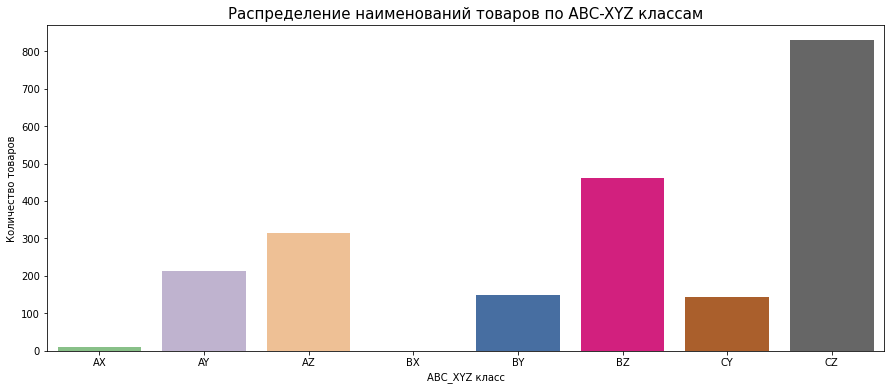

In [55]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="abc_xyz_class", 
                 y="total_products", 
                 data=ecom_abc_xyz_summary,
                 palette="Accent").set_title("Распределение наименований товаров по ABC-XYZ классам",fontsize=15)
plt.xlabel('АВС_XYZ класс')
plt.ylabel('Количество товаров')
plt.show()

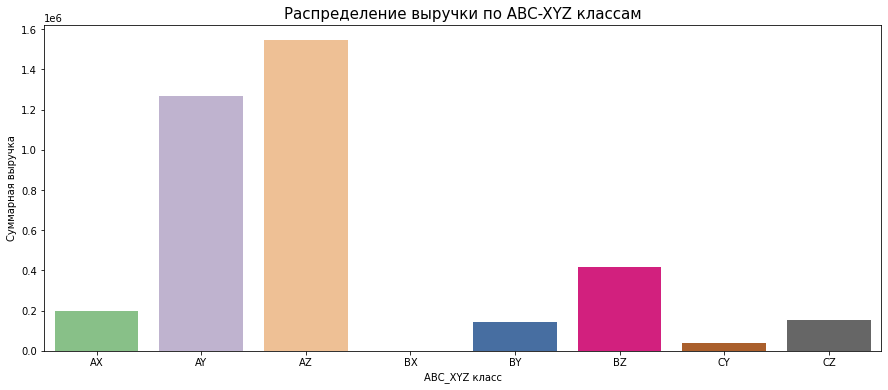

In [56]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="abc_xyz_class", 
                 y="total_revenue", 
                 data=ecom_abc_xyz_summary, 
                 palette="Accent").set_title("Распределение выручки по ABC-XYZ классам",fontsize=15)
plt.xlabel('АВС_XYZ класс')
plt.ylabel('Суммарная выручка')
plt.show()

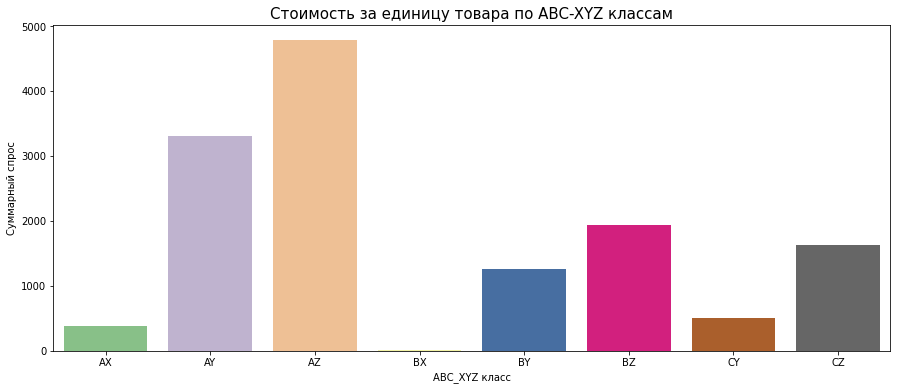

In [57]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="abc_xyz_class", 
                 y="total_demand", 
                 data=ecom_abc_xyz_summary, 
                 palette="Accent").set_title("Стоимость за единицу товара по ABC-XYZ классам",fontsize=15)
plt.xlabel('АВС_XYZ класс')
plt.ylabel('Суммарный спрос')
plt.show()

In [58]:
ecom_abc_xyz_summary.sort_values(by='total_revenue', ascending=False)

,abc_xyz_class,total_products,total_demand,avg_demand,total_revenue
2,AZ,315,4781.0,1.264815,1545402.0
1,AY,212,3310.0,1.301101,1266494.0
5,BZ,461,1944.0,0.351410,417823.0
0,AX,10,378.0,3.150000,197368.0
7,CZ,829,1627.0,0.163550,151272.0
4,BY,150,1264.0,0.702222,145500.0
6,CY,143,504.0,0.293706,37053.0
3,BX,1,7.0,0.583333,1050.0


Комбинируя данные ABC и XYZ, мы генерируем девять различных классов. Все классы с префиксом A приносят высокий доход, классы B приносят средний доход, а классы C приносят низкий доход.

Аналогичным образом, классы с суффиксом X пользуются устойчивым спросом, ими легко управлять. Классы с суффиксом Y имеют переменный, но предсказуемый спрос, поэтому ими сложнее управлять, чем классом X,но более-менее реально. Класс Z - самые сложный из всех. Они продаются нерегулярно и в разных объемах, поэтому их труднее прогнозировать.

Клас СХ в нашей товарной матрице не представлен.

**ВЫВОДЫ:**

Группы АХ и ВХ у нас очень немногочисленны: АХ-10 товаров(с общей выручкой 197368 у.е.)и ВХ- всего 1 единица стоимостью 1050у.е. В целом концентрироваться только на продвижении 11 товаров не очень разумно, поэтому есть смысл рассмотреть повнимательнее группы AY и AZ.

Группа AY генерирует хорошую выручку, вероятнее всего самая интересная для рассмотрения, так как 212 единиц получили - 1266494 у.е.

Группа AZ менее предсказуемая по продажам, тут нужно работать над тем, чтобы товары продавались чаще, здесь 315 штук имеют 1545402 у.е. прибыли.

Так же вполне можно обратить внимание на товары в группе BY, это менее стабильные по предсказуемости продаж товары,в сравнении с Х группами, но все же довольно доходные 150 единиц принесли 145500 у.е.

Группа товаров BZ еще менее предсказуемая, но  спрос на товары в ней почти невозможно спрогнозировать: 461 товара принесли  417823 у.е.

Группы СY и CZ наименее доходные, при небольшой прибыли в сравнении с другими группами, товаров продано большое количество: СY - продано 143 единицы с прибылью всего навсего 37053 у.е. и CZ - продано 829 единицы с прибылью 151272 у.е.

В итоге, можно сказать, что обратить внимание стоит именно на товары групп AY и BY, так как Y более-менее предсказуемая по спросу категория, и товары А и В приносят неплохую сумму выручки на 1 единицу.

В дальнейшем рассмотрим распределение товаров в группах AX-BX, AY-BY и AZ.
Товары групп BZ,CY,CZ будут исключены из дальнейшего анализа.


In [59]:
ecom_abc_xyz=ecom_abc_xyz[~ecom_abc_xyz['abc_xyz_class'].isin(['BZ','CY','CZ'])]


Посмотрим на наименования товаров АХ-ВХ, AY-BY, AZ:

In [60]:
ax = ecom_abc_xyz.loc[ecom_abc_xyz['abc_xyz_class'] == 'AX']
ax['product'].unique()

array(['Сумка-тележка 2-х колесная Gimi Argo красная',
       'Сумка-тележка 2-х колесная Gimi Argo синяя',
       'Тележка багажная DELTA ТБР-20 коричневый с оранжевым грузоподъемность 25 кг сумка и 50 кг каркас РОССИЯ',
       'Тележка багажная DELTA ТБР-20 синий грузоподъемность 25 кг сумка и 50 кг каркас РОССИЯ',
       'Пеларгония зональная диам. 12 см сиреневый полумахровый',
       'Пеларгония розебудная Prins Nikolai укорененный черенок',
       'Тележка багажная DELTA ТБР-21 черный грузоподъемность 25 кг для сумка и 50 кг для каркас РОССИЯ',
       'Пеларгония розебудная Queen Ingrid укорененный черенок',
       'Пеларгония зональная диам. 12 см коралловая полумахровая',
       'Таз пластмассовый со стиральной доской (Иж), 1404021'],
      dtype=object)

In [61]:
BX=ecom_abc_xyz.loc[ecom_abc_xyz['abc_xyz_class'] == 'BX']
BX['product'].unique()

array(['Пеларгония зональная простая цвет фуксии'], dtype=object)

In [62]:
AY=ecom_abc_xyz.loc[ecom_abc_xyz['abc_xyz_class'] == 'AY']
AY['product'].unique()

array(['Сумка-тележка хозяйственная Rolser BAB010 rojo JOY-1800 красная',
       'Сумка-тележка хозяйственная Andersen Scala Shopper Plus, Lini, синяя 133-108-90',
       'Муляж ЯБЛОКО 9 см красное',
       'Гладильная доска НИКА Гранд 122х42 см НГ',
       'Стремянки Colombo Leonardo 2 ступени G300A02W серая 3646',
       'Гладильная доска НИКА BLUES 124х46 см 5757',
       'Сумка-тележка 2-х колесная Gimi Galaxy черная',
       'Сумка-тележка хозяйственная Andersen Treppensteiger Scala Shopper, Hera, черная 119-004-80',
       'Сумка-тележка хозяйственная Andersen Scala Shopper, Lini, синяя 112-108-90',
       'Спатифиллум Свит Лауретта d-21 см h-95 см',
       'Коврик придверный Attribute NATURE кокосовый 60x40 см AMC015',
       'Сушилка Meliconi Stendy Junior',
       'Сумка-тележка 2-х колесная складная Gimi Flexi зеленая',
       'Сумка-тележка 3-х колесная Gimi Tris красная',
       'Сумка-тележка TWIN стальной каркас 56 л синяя, Gimi',
       'Сумка-тележка хозяйственная Ander

In [63]:
BY=ecom_abc_xyz.loc[ecom_abc_xyz['abc_xyz_class'] == 'BY']
BY['product'].unique()

array(['Вешалка гардеробная Радуга 1 ЗМИ белое серебро ВНП 298 бс',
       'Рукав для гладильной доски COLOMBO STIRAMANICHE 53Х13 см B138LGPW',
       'Пеларгония зональная диам. 12 см малиновая с красным полумахровая',
       'Виола рассада однолетних цветов в кассете по 10 шт',
       'Чехол для гладильной доски METAL 135х53 см, Attribute, ABM105',
       'Пеларгония плющелистная ампельная, диам. 12 см',
       'Рассада зелени для кухни Мята Морокан диам. 9 см',
       'Салатник Luminarc ПОЭМА АНИС 12 см J1349',
       'Пеларгония зональная махровая микс d-12 см',
       'Калибрахоа Aloha Double Purple сиреневая махровая объем 0,5 л',
       'Пеларгония зональная диам. 12 см ярко розовая махровая',
       'Пеларгония розоцветная РЕД РОЗЕБУД молодые растения',
       'Бакопа ампельная махровая сиреневая махровая объем 0,5 л',
       'Щетка хозяйственная с резинкой из синтетического каучука и пластика POWERSLIDE 40х20 см голубая, Leifheit, 51520',
       'Корзина для белья ЭЛЬФПЛАСТ Ви

In [64]:
AZ=ecom_abc_xyz.loc[ecom_abc_xyz['abc_xyz_class'] == 'AZ']
AZ['product'].unique()

array(['Простынь вафельная 200х180 см WELLNESS RW180-01 100% хлопок',
       'Вешалки мягкие для деликатных вещей 3 шт шоколад',
       'Тележка багажная DELTA ТБР-22 синий грузоподъемность 20 кг сумка и 50 кг каркас РОССИЯ',
       'Набор ножей Attribute CHEF 5 предметов AKF522',
       'Урна уличная "Гео", Hobbyka/Хоббика, 59*37,5см, сталь',
       'Салфетка Protec Textil Polyline 30х43 см Аметист белая 6230',
       'Стремянка Scab Balzo 762 5 ступеней алюминиевая 3885',
       'Тагетис крупноцветковый рассада однолетних цветов в кассете по 10 шт',
       'Мусорный контейнер Hailo BigBin Swing 45 0845-010 45 л хром',
       'Муляж Яблоко зеленый 9 см полиуретан',
       'Одеяло Wellness T142 белое темостеганое 140х205 см чехол 100% полиэстер 200 г/м 4690659000306',
       'Стремянка бытовая Framar Slimmy 4 ступени',
       'Контейнер для мусора ДОМИНИК CURVER 25 л серебристый 05322-877',
       'Сушилка уличная Leifheit 85210 LINOMATIC V 400 40 м 175х237х237 см зеленая',
       'Суш

In [65]:
ecom_abc_xyz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 688 entries, 0 to 1146
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product        688 non-null    object 
 1   abc_class      688 non-null    object 
 2   abc_rank       688 non-null    int64  
 3   total_revenue  688 non-null    float64
 4   m1             688 non-null    float64
 5   m2             688 non-null    float64
 6   m3             688 non-null    float64
 7   m4             688 non-null    float64
 8   m5             688 non-null    float64
 9   m6             688 non-null    float64
 10  m7             688 non-null    float64
 11  m8             688 non-null    float64
 12  m9             688 non-null    float64
 13  m10            688 non-null    float64
 14  m11            688 non-null    float64
 15  m12            688 non-null    float64
 16  std_demand     688 non-null    float64
 17  total_demand   688 non-null    float64
 18  avg_deman

На первый взгляд лучше и стабильнее всего продаются сумки-тележки и растения, а именно Пеларгония.

## Категории товаров

В рамках данной работы я не буду подробно детализировать все товары, но хотелось бы посмотреть, какую часть составляют растения, которые, на первый взгляд, превосходят по количеству в некоторых АВС_XYZ классах, сумки и тележки, их тоже довольно большое количество, и остальные товары.


In [66]:
#сформируем списки слов, по которым будем присваивать категории
herbs= ['пеларгония','петуния','герань','рассада','растение', 'кашпо',
        'верб', 'калибрахоа', 'бакопа','фиалка','антуриум','цветок',
        'горш','мимоза','спатифиллум', 'эвкалипт','мята','томат','эвкалипт',
        'циперус','мединилла','тимьян','лаванда','фаленопсис','дерево', 
        'роза','эпипремнум','цитрофортунелла','папоротник','кактус','тюльпаны',
        'ранункулус','пуансеттия','лобелия','хлорофитум', 'фуксия','мирт', 'колокольчик',
        'декабрист', 'алоэ', 'цикламен','калла']

carts = ['сумка', 'тележк', 'корзин']

household_goods=['таз','вешалк', 'гладильная', 'сушилка','ведро', 'полк', 'ясколка','банка',
                 'коврик', 'ковер','чехол','терка','кружка','муляж','стремянк', 'корыто', 'щетка',
                'ерш','штора', 'тарелка', 'комод', 'штанга', 'скатерть', 'измельчитель', 
                 'весы', 'сиденье', 'покрытие', 'крючок', 'стеллаж', 'блюдце','блюдо', 'салатник', 
                 'хлебница', 'комплект', 'простынь', 'набор', 'урна', 'контейнер', 'одеяло',
                 'наматрацник', 'веник', 'емкость','сиденье', 'покрывало', 'ручка', 'паста', 'карниз',
                 'швабра', 'композиция', 'ковш',
                'шпингалет', 'коробка', 'салфетк', 'электроштопор', 'скалка', 'штанга', 'бак', 'ткань',
                'нож', 'кастрюля', 'сметка', 'половник', 'плечики', 'завертка', 'кофр', 'вес',
                'сковорода', 'этажерка', 'стеллаж', 'окномойка', 'хоста', 'пылесос', 'мантоварка', 
                'плед', 'фал', 'термометр', 'белье','карниз', 'халат', 'варка', 'миксер', 'обувница',
                'крепеж', 'перчатки', 'лоток', 'отделитель', 'салатник', 'подкладка', 'подставка',
                'полотенце', 'рукав']

In [67]:
#напишем функцию присваивания категории
ecom_abc_xyz['category'] = 0
def categoryzer(list_of_words, category):
  join = '|'.join(list_of_words)
  index = ecom_abc_xyz[ecom_abc_xyz['product'].str.lower().str.contains(join)].index.to_list()
  for i in index:
    ecom_abc_xyz.loc[i, 'category'] = category
  return ecom_abc_xyz

In [68]:
# присвоим категории товарам в нашем датафрейме
categoryzer(herbs, 'растения')
categoryzer(carts, 'cумки и тележки')
categoryzer(household_goods, 'товары для дома')
#categoryzer(0, 'другое')

,product,abc_class,abc_rank,total_revenue,m1,m2,m3,m4,m5,m6,...,m10,m11,m12,std_demand,total_demand,avg_demand,cov_demand,xyz_class,abc_xyz_class,category
0,Сумка-тележка 2-х колесная Gimi Argo красная,A,1,76090.0,0.0,1.0,2.0,17.0,14.0,10.0,...,7.0,0.0,0.0,5.718126,70.0,5.833333,0.980250,X,AX,cумки и тележки
1,Сумка-тележка 2-х колесная Gimi Argo синяя,A,2,58911.0,5.0,5.0,3.0,4.0,3.0,1.0,...,4.0,1.0,17.0,4.209477,55.0,4.583333,0.918431,X,AX,cумки и тележки
2,Простынь вафельная 200х180 см WELLNESS RW180-0...,A,3,53232.0,30.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8.660254,30.0,2.500000,3.464102,Z,AZ,товары для дома
3,Сумка-тележка хозяйственная Rolser BAB010 rojo...,A,4,49668.0,5.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,3.0,1.858641,12.0,1.000000,1.858641,Y,AY,cумки и тележки
4,Вешалки мягкие для деликатных вещей 3 шт шоколад,A,5,49596.0,0.0,0.0,0.0,0.0,0.0,335.0,...,0.0,0.0,0.0,96.706170,335.0,27.916667,3.464102,Z,AZ,товары для дома
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132,Коврик Sochi 50х80 см коричневый 5801,B,1133,478.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.389249,2.0,0.166667,2.335497,Y,BY,товары для дома
1133,Муляж Виноград желтый 24 см полиуретан,B,1134,478.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.389249,2.0,0.166667,2.335497,Y,BY,товары для дома
1134,Чехол для гладильной доски Zalger 520133 120х4...,B,1135,478.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.389249,2.0,0.166667,2.335497,Y,BY,товары для дома
1143,Чехол для одежды Hausmann со стенкой из ПВХ и ...,B,1144,464.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.389249,2.0,0.166667,2.335497,Y,BY,товары для дома


In [69]:
pd.pivot_table(ecom_abc_xyz,
               index=["category", "abc_xyz_class"],
               values=["total_revenue"],
               aggfunc=[np.sum, len]).T

category          cумки и тележки                             растения  \
abc_xyz_class                  AX        AY        AZ      BY       AX   
sum total_revenue        162998.0  440967.0  219728.0  8765.0  30781.0   
len total_revenue             5.0      45.0      37.0     7.0      4.0   

category                                               товары для дома  \
abc_xyz_class            AY        AZ      BX       BY              AX   
sum total_revenue  175121.0  185201.0  1050.0  80171.0          3589.0   
len total_revenue      42.0      29.0     1.0     87.0             1.0   

category                                         
abc_xyz_class            AY         AZ       BY  
sum total_revenue  650406.0  1140473.0  56564.0  
len total_revenue     125.0      249.0     56.0

In [70]:
count_category = ecom_abc_xyz.groupby(['category']).agg({'product':'count', 'total_revenue':'sum'})
count_category

,product,total_revenue
category,,
cумки и тележки,94,832458.0
растения,163,472324.0
товары для дома,431,1851032.0


**Выводы по категориям товаров:**  

 **АХ-ВХ категория:**  
 cумки и тележки - 5 штук на сумму 16299.8 у.е, вроде бы немного, но это половина от всех товаров категории.
 растения-5 штук на сумму 3183.1 у.е.
 товары для дома - 1 товар на сумму 358.9 у.е.
 
 в этой категории попровну делят популярность сумки-тележки и цветы, тележки при равном количестве приносят больше прибыли, чем растения.
 
 **АУ- категория:**   
 cумки и тележки - 45 штук на сумму 44096.7 у.е, вроде бы немного, но это половина от всех товаров категории.
 растения-42 штуки на сумму 17512.1 у.е.
 товары для дома - 125 товар на сумму 65040.6 у.е.
 
 В основном преобладают товары для дома, в 2,5 раза меньше востребованы сумки-тележки и растения.
 
 **BY категория:**
 cумки и тележки - 7 штук на сумму 876.5 у.е, вроде бы немного, но это половина от всех товаров категории.
 растения-87 штук на сумму 8017.1. у.е.
 товары для дома - 56 товаров на сумму 5656.4 у.е
 
 В этой категории популярнее растения, товары для дома тоже пользуются спросом, тележек мало.
 
 **AZ категория:**  
 cумки и тележки - 37 штук на сумму 21972.8 у.е, вроде бы немного, но это половина от всех товаров категории.
 растения-29 штук на сумму 	18520.1 у.е.
 товары для дома - 249 товар на сумму 	114047.3 у.е.
 
 Здесь товары для дома самые востребованные, цветы и сумки популярны гораздо меньше.
 
**Выручка по категориям:**  
cумки и тележки	94 штуки на	832458 у.е.    
растения 163 штуки на 472324 у.е.  
товары для дома	продано 431	экземпляр за 1851032 у.е. в сумме  
 
 
**ИТОГ:**
наиболее стабильные и доходные категории товаров это сумки и тележки с растениями. Товары для дома более стихийны среди покупателей. 

### Продажи категорий товаров по месяцам

In [71]:
ecom_abc_xyz = ecom_abc_xyz.merge(ecom_12m[['product','month']], on='product')
ecom_abc_xyz

,product,abc_class,abc_rank,total_revenue,m1,m2,m3,m4,m5,m6,...,m11,m12,std_demand,total_demand,avg_demand,cov_demand,xyz_class,abc_xyz_class,category,month
0,Сумка-тележка 2-х колесная Gimi Argo красная,A,1,76090.0,0.0,1.0,2.0,17.0,14.0,10.0,...,0.0,0.0,5.718126,70.0,5.833333,0.980250,X,AX,cумки и тележки,2
1,Сумка-тележка 2-х колесная Gimi Argo красная,A,1,76090.0,0.0,1.0,2.0,17.0,14.0,10.0,...,0.0,0.0,5.718126,70.0,5.833333,0.980250,X,AX,cумки и тележки,3
2,Сумка-тележка 2-х колесная Gimi Argo красная,A,1,76090.0,0.0,1.0,2.0,17.0,14.0,10.0,...,0.0,0.0,5.718126,70.0,5.833333,0.980250,X,AX,cумки и тележки,3
3,Сумка-тележка 2-х колесная Gimi Argo красная,A,1,76090.0,0.0,1.0,2.0,17.0,14.0,10.0,...,0.0,0.0,5.718126,70.0,5.833333,0.980250,X,AX,cумки и тележки,4
4,Сумка-тележка 2-х колесная Gimi Argo красная,A,1,76090.0,0.0,1.0,2.0,17.0,14.0,10.0,...,0.0,0.0,5.718126,70.0,5.833333,0.980250,X,AX,cумки и тележки,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3982,Чехол для гладильной доски Zalger 520133 120х4...,B,1135,478.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.389249,2.0,0.166667,2.335497,Y,BY,товары для дома,4
3983,Чехол для одежды Hausmann со стенкой из ПВХ и ...,B,1144,464.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.389249,2.0,0.166667,2.335497,Y,BY,товары для дома,4
3984,Чехол для одежды Hausmann со стенкой из ПВХ и ...,B,1144,464.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.389249,2.0,0.166667,2.335497,Y,BY,товары для дома,5
3985,Чехол для одежды Hausmann со стенкой из ПВХ и ...,B,1147,464.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.389249,2.0,0.166667,2.335497,Y,BY,товары для дома,1


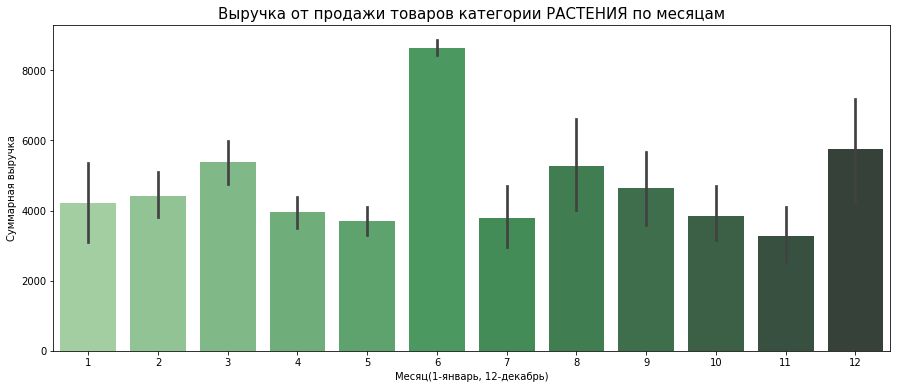

In [72]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="month", 
                 y="total_revenue", 
                 data=ecom_abc_xyz[ecom_abc_xyz['category']=='растения'],
                 palette="Greens_d")\
                 .set_title("Выручка от продажи товаров категории РАСТЕНИЯ по месяцам",fontsize=15)
plt.xlabel('Месяц(1-январь, 12-декабрь)')
plt.ylabel('Суммарная выручка')
plt.show()

График показывает, что растения довольно стабильная категория, всплеск продаж наблюдается в июне и декабре.

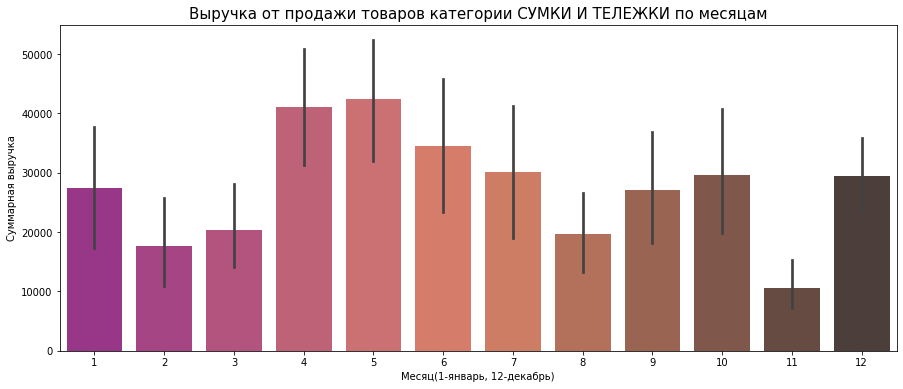

In [73]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="month", 
                 y="total_revenue", 
                 data=ecom_abc_xyz[ecom_abc_xyz['category']=='cумки и тележки'],
                 palette="plasma_d")\
                 .set_title("Выручка от продажи товаров категории СУМКИ И ТЕЛЕЖКИ по месяцам",fontsize=15)
plt.xlabel('Месяц(1-январь, 12-декабрь)')
plt.ylabel('Суммарная выручка')
plt.show()

Категория СУМКИ И ТЕЛЕЖКИ показывает хорошую выручку с апреля по июль, провальные месяцы февраль и ноябрь.

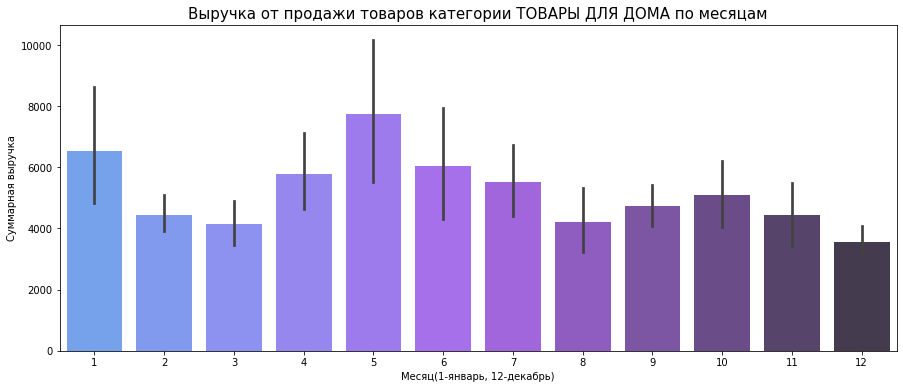

In [74]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="month", 
                 y="total_revenue", 
                 data=ecom_abc_xyz[ecom_abc_xyz['category']=='товары для дома'],
                 palette="cool_d")\
                 .set_title("Выручка от продажи товаров категории ТОВАРЫ ДЛЯ ДОМА по месяцам",fontsize=15)
plt.xlabel('Месяц(1-январь, 12-декабрь)')
plt.ylabel('Суммарная выручка')
plt.show()

ТОВАРЫ ДЛЯ ДОМА в годовом периоде лучше всего продаются в январе и с апреля по июль.

**ИТОГИ:**

1) Был проведён ABC_XYZ анализ ассортимента интернет-магазина товаров для дома "Пока все ещё тут", в итоге которого товары были распределены по соотношению стабильности продаж и прибыльности за единицу товара.
    
Товары из групп AX и BX обеспечивают основной доход и при этом стабильно продаются. Они всегда должны быть на складе. Необходимый запас легко спрогнозировать, так как объемы продаж почти не меняются от месяца к месяцу.
Необходимо предлагать покупателям этой группы новые товары или проводить маркетинговые мероприятия;
    
Группы АY и BY — это тоже высокий доход, но стабильность продаж уже ниже. По этим товарам на складе необходимо создать дополнительные резервы, на случай роста спроса в отдельные периоды. Резерв нужен обязательно, это важные для компании группы, которые приносят значительную часть дохода.  

Группа CX у нас не представлена. 

AY, BX, CX – категории клиентов, которые нужно удерживать. Можно продумать, как увеличить продажи этим клиентам или частоту их покупок. Тогда они перейдут в категорию выше и будут приносить фирме больше денег;

Группы AZ и BZ тоже приносят существенный доход. Но спрос на них почти невозможно спрогнозировать. Если создавать запасы на складе, исходя из максимально возможной месячной выручки, то значительная часть товара может остаться непроданной. Поэтому лучше использовать другие способы, которые обеспечат нужное количество товара. Например, заключить договоры с поставщиками, которые находятся максимально близко от магазина и могут в любой момент привезти нужную партию. 

AZ- клиенты, чье поведение нужно дополнительно изучать. Это важные клиенты (группа А), которые заключают сделки на большие суммы, но редко. Необходимо изучить, есть ли у них незакрытые потребности. Возможно, они взаимодействуют с другими продавцами-конкурентами. Тогда важно понять, как их сделать постоянными покупателями и что им можно предложить;
 

Группа CY — небольшие объемы продаж и невысокая стабильность. Запасы этой группы нужно создавать по остаточному принципу, т. е. после того, как выделены деньги на закупки товаров из более выгодных групп. Даже если в какой-то момент товара из этой группы не окажется на складе, потери компании будут невелики; 

Группа CZ — самые низкие объемы выручки, при этом спрос невозможно спрогнозировать. Сюда относятся товары, которые уже перестали пользоваться спросом. Запасы по этой категории обычно не создают, работают под заказ. Но в эту группу могут попасть и новинки. Они не пользуются спросом потому, что клиенты пока о них не знают. Эти товары еще не привезли в магазины, не выставили на витринах, не запустили маркетинговую кампанию и пр. 
CZ – нерентабельная группа клиентов. По возможности, для их привлечения проводятся дополнительные маркетинговые акции. Цель акций – сделать так, чтобы потребность в товарах бренда возникала чаще. Если не получается увеличить частоту покупок, то стоит найти способ увеличить объемы закупок;

2) Далее в каждой группе ABC_XYZ были выделены три основные категории и изуено распределение товаров по популярности в этих категориях:

cумки и тележки	94 штуки на	832458 у.е.    
растения 163 штуки на 472324 у.е.  
товары для дома	продано 431	экземпляр за 1851032 у.е. в сумме  
 
На основе категорий был сделан вывод, что наиболее стабильные и доходные категории товаров это сумки и тележки, а также  растения. Товары для дома более стихийны среди покупателей и менее предсказуемы. 

3) ОБЩИЕ ВЫВОДЫ И РЕКОМЕНДАЦИИ:
 
Категория товаров РАСТЕНИЯ имеет всплески спроса,связанного с активной продажей рассады с мая по июнь. Тем не менее, комнатные растения (Пеларгония,Петуния) популярны в течение всего года и входят в группу AX, то есть имеет смысл увеличить их закупку , также в целом имеет смысл расширить ассортимент комнатных растений, особенно продающихся по случаю праздников.

Категория СУМКИ И ТЕЛЕЖКИ встречается в каждой из рентабельных групп ABX, AY, AZ. Спрос стабилен в течение всего времени за исключением ноября и февраля, можно предположить, что если магазин находится в Москве, то это связано со снегом, возможно в этот период стоит обратить внимание на модификацию тележек, адаптированную к этому времени года (если такая существует:) Это тоже категория товаров, которую стоит наращивать, в отличие от растений выручка за единицу товара ощутимо больше, она не требует дополнительного ухода.

ТОВАРЫ ДЛЯ ДОМА очень разноплановая категория и требует дальнейшего изучения. Надо сказать, что и тут имеет смысл увеличивать количество и ассортимент более крупных товаров, таких как: сушилки, полки, стеллажи, вешалки, потому что их частотность в групах ABC_XYZ выше,чем покупки более мелких товаров.

## Статистические гипотезы:

###  Средняя выручка по классам товаров AY и AZ одинакова

Н0 (нулевая гипотеза) - Средняя выручка по классам товаров AY и AZ одинакова   
Н1 (альтернативная гипотеза) - Средняя выручка по классам товаров AY и AZ различается  

In [75]:
alpha = .05

results = st.ttest_ind(
    AY['total_revenue'], 
    AZ['total_revenue'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


p-значение: 0.03797487826108664
Отвергаем нулевую гипотезу


Гипотеза о том, что средняя выручка товаров групп AY и AZ одинакова, не подтвердилась. Проверим механически:

In [76]:
AY['total_revenue'].mean()

5974.028301886792

In [77]:
AZ['total_revenue'].mean()

4906.038095238096

### Продажи  в дневной и ночной период одинаковы

Н0 (нулевая гипотеза) - Количество заказов в дневной и ночной период одинаково
Н1 (альтернативная гипотеза) - Количество заказов в дневной и ночной период различается 

In [78]:
ecom_12m['time']  = ecom_12m['date'].dt.hour
eco_day = ecom_12m.query('time > 20 or time < 8')['order_id']
eco_night =  ecom_12m.query('time > 7 or time < 21')['order_id']

alpha = 0.05 # критический уровень статистической значимости

results = st.ttest_ind(eco_day,eco_night,nan_policy ='omit')
    
print('p-значение: ', results.pvalue)
    
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.018771880305434214
Отвергаем нулевую гипотезу


Гипотеза о том, что дневная и ночная выручки одинаковы, не подтвердилась.